In [86]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet

# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from pandas.tseries.offsets import DateOffset

from plotly import tools
import plotly.graph_objects as go
import plotly.figure_factory as ff  # this is still valid

import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  # This sets the seaborn whitegrid style


In [87]:
import pandas as pd 
df = pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [88]:
# Brief Description of our dataset
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [89]:
# Replace the column name from name to ticks
df = df.rename(columns={'Name': 'Ticks'})

For this simple tutorial we will analyze Amazon's stock and see what will the trend look like for the nearby future of this stock relying on past stock prices.

In [90]:
# Let's analyze some of the stocks.
amzn = df.loc[df['Ticks'] == 'AMZN']
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


We need to make sure if the date column is either a categorical type or a datetype. In our case date is a categorical datatype so we need to change it to datetime.

In [91]:
amzn.info() # Check whether the date is as object type or date type

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Ticks   1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [92]:
#  Change to dateformat
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [93]:
# Create a copy to avoid SettingWithCopyWarning
amzn_df = amzn.copy()

# Convert 'date' column to datetime with correct format
amzn_df.loc[:, 'date'] = pd.to_datetime(amzn_df.loc[:, 'date'], format="%Y-%m-%d")


In [94]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Ticks   1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


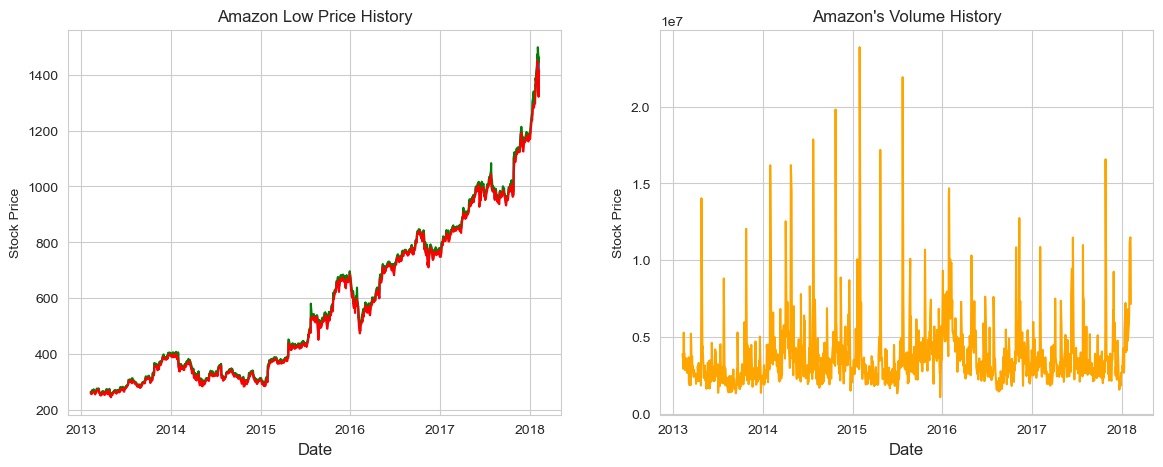

In [95]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amzn_df["date"], amzn_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Second Subplot
ax1.plot(amzn_df["date"], amzn_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon High Price History")

# Third Subplot
ax1.plot(amzn_df["date"], amzn_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Low Price History")

# Fourth Subplot
ax2.plot(amzn_df["date"], amzn_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()

### Prophet Introduction:
Prophet is Facebook's library for time series forecasting. In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.) However, I wanted to show the simplicity of using Prophet for simple forecasting which is the main aim of this kernel.

#### Steps for using Prophet:
<ul>
<li>Make sure you replace closing price for y and date for ds. </li>
<li>Fit that dataframe to Prophet in order to detect future patterns. </li>
<li>Predict the upper and lower prices of the closing price. </li>
</ul>

In [96]:
m = Prophet()

# Drop the columns
ph_df = amzn_df.drop(['open', 'high', 'low','volume', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
46387,2013-02-08 00:00:00,261.95
46388,2013-02-11 00:00:00,257.21
46389,2013-02-12 00:00:00,258.70
46390,2013-02-13 00:00:00,269.47
46391,2013-02-14 00:00:00,269.24


In [97]:
m = Prophet()

m.fit(ph_df)

16:37:19 - cmdstanpy - INFO - Chain [1] start processing
16:37:20 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,1815.963028,1112.882083,2508.495845
1620,2019-02-04,1791.630511,1068.173675,2494.843330
1621,2019-02-05,1791.970314,1084.471546,2492.744239
1622,2019-02-06,1792.150335,1060.503127,2486.850238
1623,2019-02-07,1792.065141,1058.876296,2494.339612


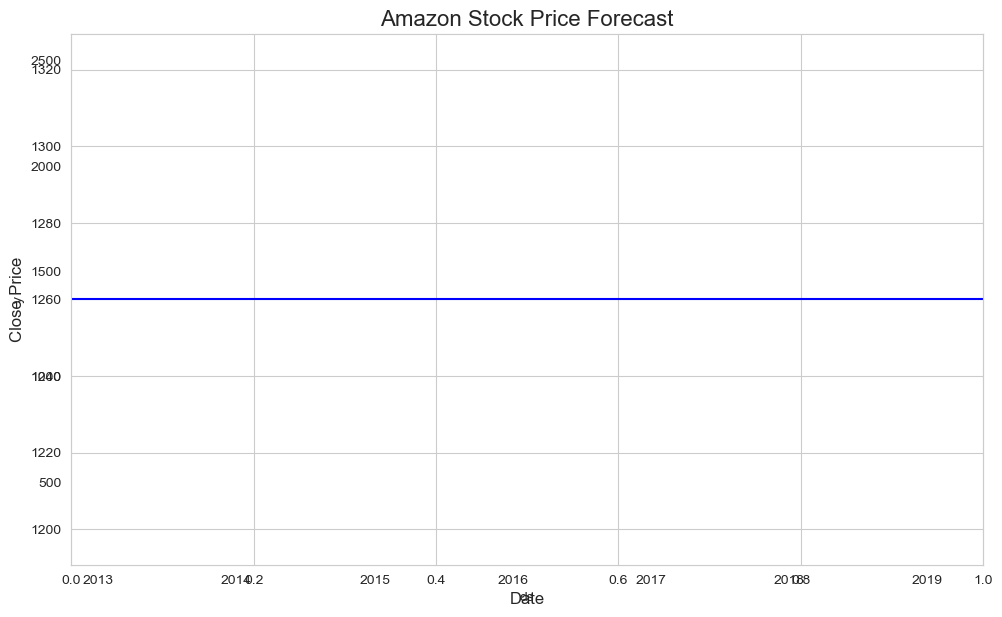

In [99]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

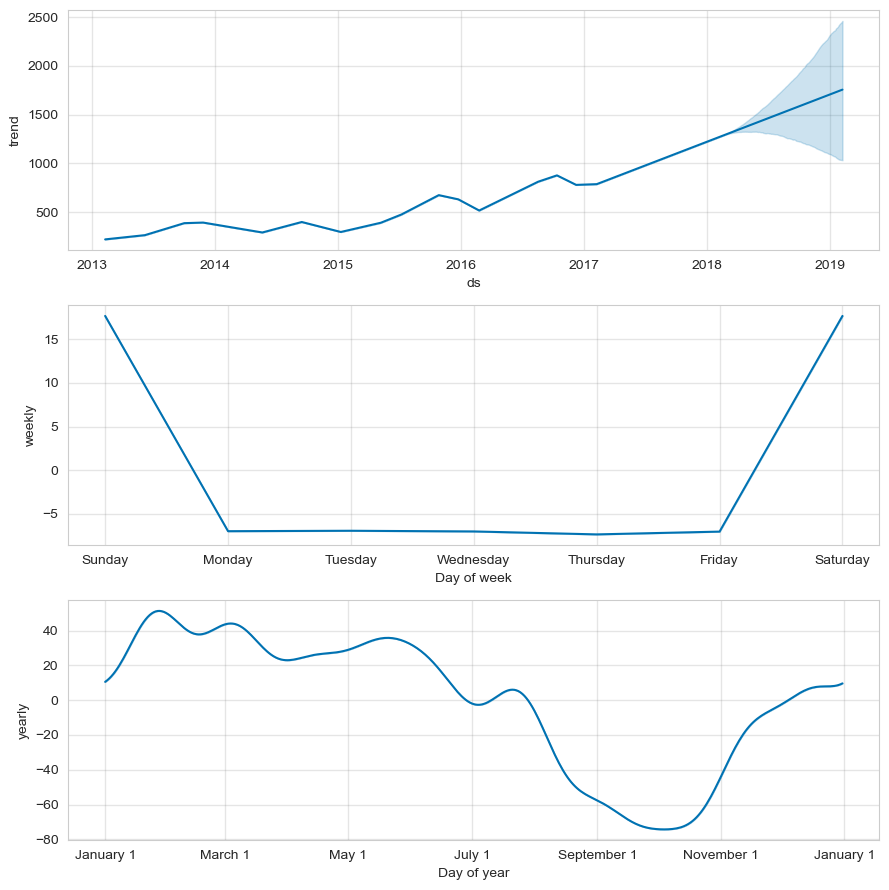

In [100]:
fig2 = m.plot_components(forecast)
plt.show()

16:37:21 - cmdstanpy - INFO - Chain [1] start processing
16:37:21 - cmdstanpy - INFO - Chain [1] done processing


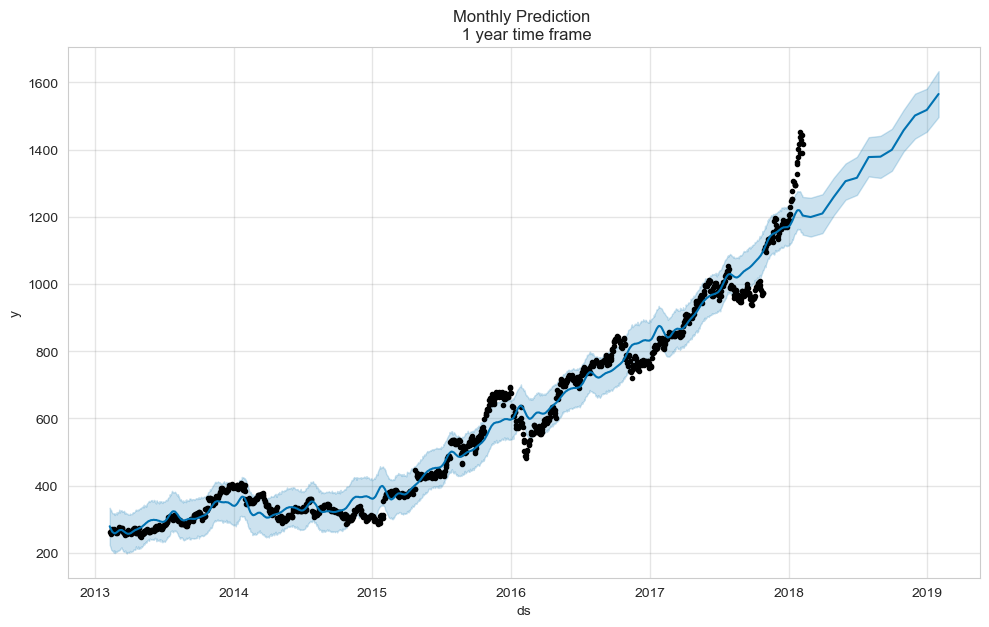

In [101]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

#### Trends:
<ul> 
<li>Amazon's stock price is showing signs of upper trend yearly. </li>
<li> Amazon's stock price show upper trend signs during January (December Sales tend to give a boost to Amazon's stock price)</li>
<li>There is no weekly trend for stock prices. </li>
</ul>

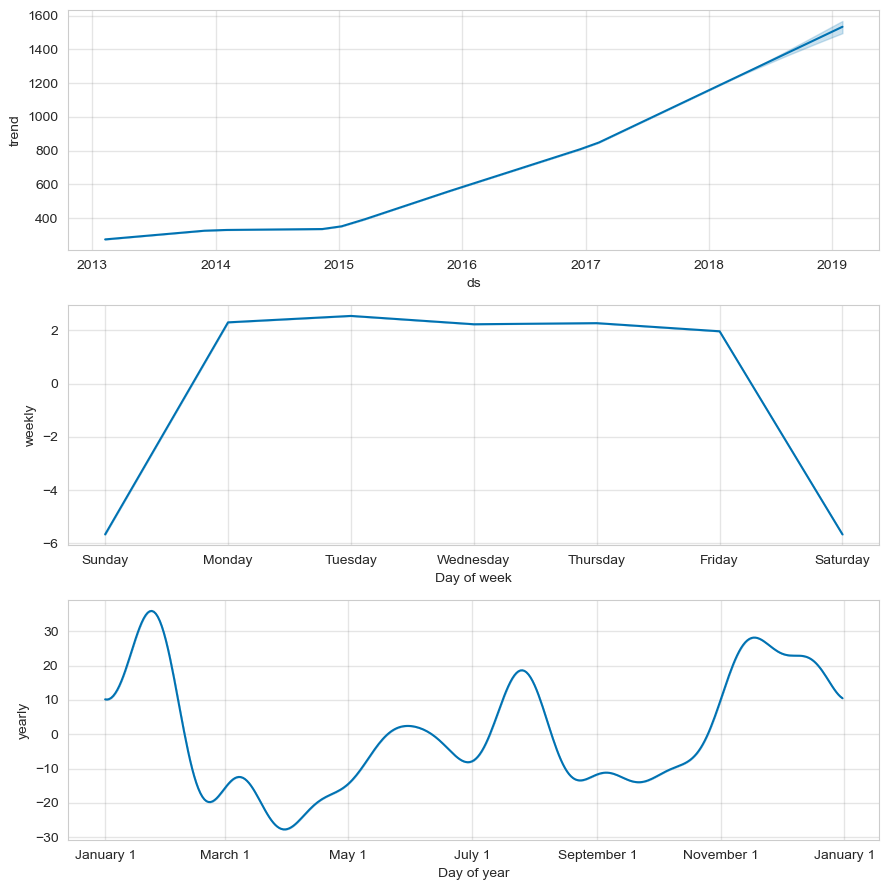

In [102]:
fig = m.plot_components(fcst)
plt.show()

<h2>Technical Analysis: </h2>
In this section we will go into basic technical concepts when dealing with stock investing. This are simple theories however, we shouldn't solely rely on these concepts to maximize profits as it is the case with patterns related to moving averages. Before going into this concepts, I will like to show how OHLC and Candlesticks are interpreted.

<h3 align="center">Open High Low Close (OHLC): </h3>
<img src="https://image.slidesharecdn.com/forexcandlestick-151105160826-lva1-app6892/95/forex-candlestick-5-638.jpg?cb=1446739926" ></img>
<br><br>
<h3 align="center">CandleSticks: </h3>
<img src="http://wealthv.com/learn/actionforex/images/candlestick_charts_explained_1.gif" ></img>
<br><br>
<h3 align="center">Moving Averages: </h3>
<img src="https://commodity.com/wp-content/uploads/technical-analysis/MASimple50200SPY.gif" ></img>

In [103]:
trace = go.Ohlc(x=amzn_df['date'],
                open=amzn_df['open'],
                high=amzn_df['high'],
                low=amzn_df['low'],
                close=amzn_df['close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'President Donald Trump <br> takes Office'
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In [104]:
amzn_df['date'] = pd.to_datetime(amzn_df['date'], format="%Y-%m-%d")



In [105]:
last_two = amzn_df.loc[amzn_df['date'].dt.year > 2016]


In [106]:
last_two = amzn_df.loc[amzn_df['date'].dt.year > 2016]

g = last_two.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price <br> <i>For the Last two years </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2018-01-02', 'x1': '2018-01-02',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2018-01-07', 'y': 0.9, 'xref': 'x', 'yref': 'paper',
        'showarrow': True, 'xanchor': 'left',
        'text': 'Upward Trend'
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In [107]:
amzn_df['month_year'] = pd.to_datetime(amzn_df['date']).dt.to_period('M')

# 2017 onwards
last_year = amzn_df.loc[amzn_df['date'].dt.year > 2017]
g = last_year.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

monthly_averages.dtypes


trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))


layout = {
    'title': 'Amazon Historical Price <br> <i>A closer look to the upward trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In [108]:
amzn_df.head()

,date,open,high,low,close,volume,Ticks,month_year
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013-02
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013-02
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013-02
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013-02
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013-02


In [109]:
# Moving Averages (10, 50 and 200)
amzn_df['10_d_avg'] = amzn_df.close.rolling(window=10).mean()
amzn_df['50_d_avg'] = amzn_df.close.rolling(window=50).mean()
amzn_df['200_d_avg'] = amzn_df.close.rolling(window=200).mean()
close_p = amzn_df['close'].values.tolist()


# Variables to insert into plotly
ten_d = amzn_df['10_d_avg'].values.tolist()
fifty_d = amzn_df['50_d_avg'].values.tolist()
twoh_d = amzn_df['200_d_avg'].values.tolist()
date = amzn_df['date'].values.tolist()

# Set date as index
amzn_df = amzn_df.set_index('date')

In [110]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['close']:
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)
    
fig['layout'].update(height=800,title='Relationship between MAs <br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')

In [111]:
# Take off the date index
amzn_df = amzn_df.reset_index()

# Plotly
trace0 = go.Scatter(
    x = amzn_df['date'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ('#ff6347'),
        width = 4)
)
trace1 = go.Scatter(
    x = amzn_df['date'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
    dash="dot")
)
trace2 = go.Scatter(
    x = amzn_df['date'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)

data = [trace0, trace1, trace2]


# Edit the layout
layout = dict(title = 'Moving Averages for Amazon',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'),
              annotations=[
        dict(
            x='2016-01-13',
            y=657,
            xref='x',
            yref='y',
            text='<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
            showarrow=True,
            arrowhead=5,
            ax=5,
            ay=-50
        ), dict(
        x = "2016-02-24",
        y = 535,
        text = "<i>Upward trend after <br> 10-day crosses <br>200-day moving average </i>",
        textangle = 0,
        ax = 50,
        ay = 50,
        font = dict(
          color = "black",
          size = 12
        )
        )],
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

<h2> Stocks more Susceptible to Seasonality Trends: </h2>
In this section I want to show some types of stocks that are more vulnerable to seasonality such as airlines, hotel chains or cruiseships. In this example I will use American Airlines to demonstrate how a certain extent of the stock is influenced by seasonality movements.

<h3>Summary: </h3>
<ul>
    <li>December and January tends to be the months were there are more upward trends for the stock. </li>
    <li>July as well but not as much as December and January. </li>
    <li>September tends to be the month with the most downward pressure. </li>
    </ul>


In [112]:
# American Airlines
aal_df = df.loc[df["Ticks"] == "AAL"]

aal_df['date'] = pd.to_datetime(aal_df['date'], errors='coerce')


aal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Ticks   1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


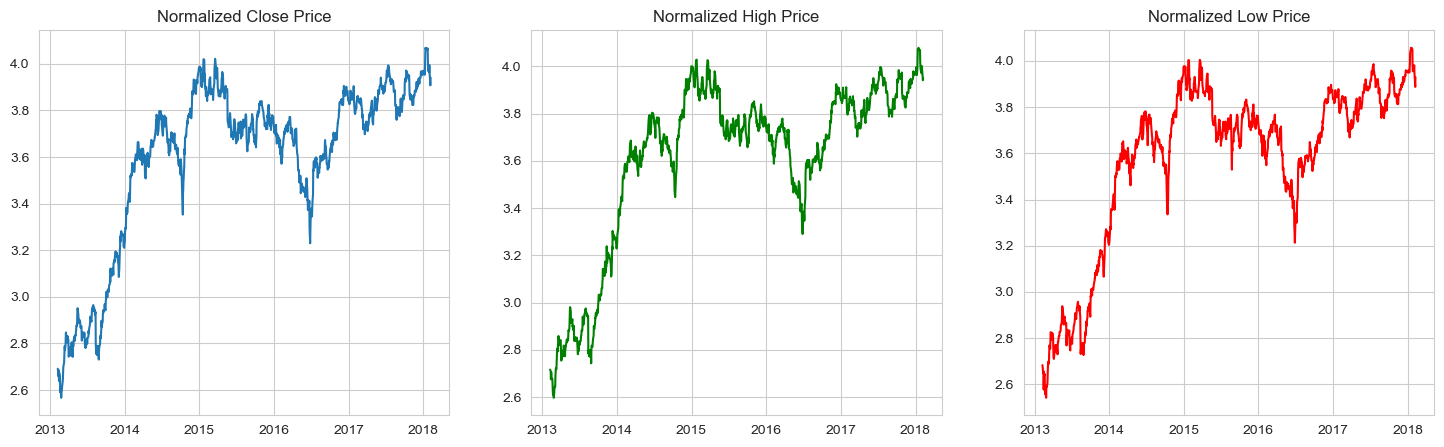

In [113]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

aal_df["close_log"] = np.log(aal_df["close"])
aal_df["high_log"] = np.log(aal_df["high"])
aal_df["low_log"] = np.log(aal_df["low"])

ax1.plot(aal_df["date"], aal_df["close_log"])
ax1.set_title("Normalized Close Price")
ax2.plot(aal_df["date"], aal_df["high_log"], color="g")
ax2.set_title("Normalized High Price")
ax3.plot(aal_df["date"], aal_df["low_log"], color="r")
ax3.set_title("Normalized Low Price")
plt.show()

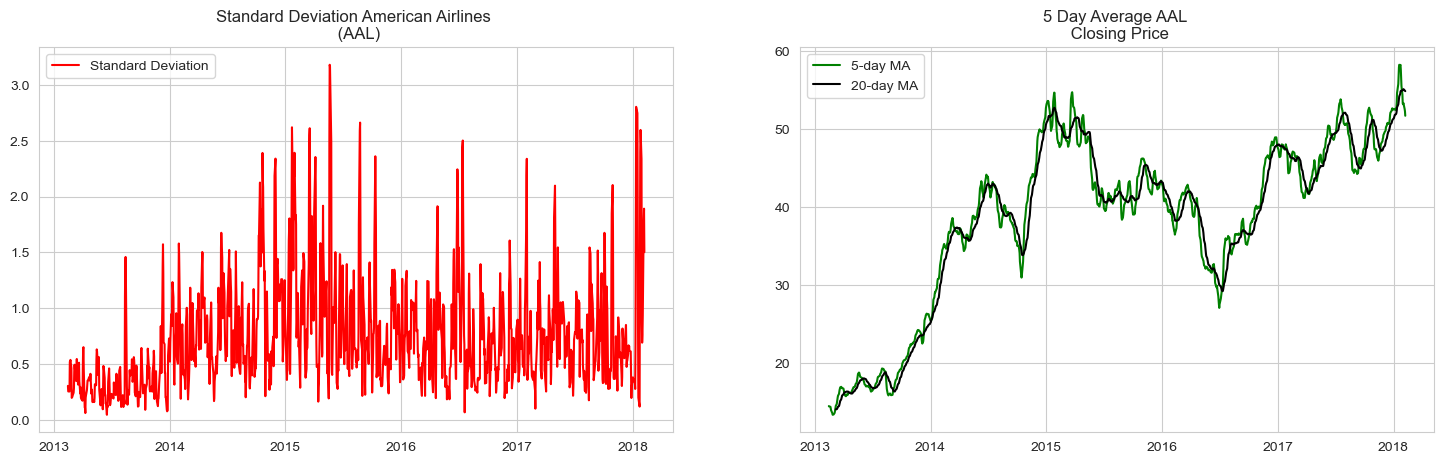

In [114]:
aal_df['std_close'] = aal_df["close"].rolling(5).std()
aal_df['mean_close'] = aal_df["close"].rolling(5).mean()
aal_df['twenty_mean_close'] = aal_df["close"].rolling(20).mean()

f, (std_ax, avg_ax) = plt.subplots(1, 2, figsize=(18,5))

std_ax.plot(aal_df["date"], aal_df["std_close"], color="r", label="Standard Deviation")
std_ax.legend(loc="upper left")
std_ax.set_title("Standard Deviation American Airlines \n (AAL)")

avg_ax.plot(aal_df["date"], aal_df["mean_close"], color="g", label="5-day MA")
avg_ax.plot(aal_df["date"], aal_df["twenty_mean_close"], color="k", label="20-day MA")
avg_ax.legend(loc="upper left")
avg_ax.set_title("5 Day Average AAL \n Closing Price")
plt.show()

In [115]:
m = Prophet()

# Drop the columns
ph_df = aal_df.drop(['open', 'high', 'low','volume', 'Ticks', 'close_log', 'high_log', 'mean_close', 'twenty_mean_close', 'low_log', 'std_close'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()



,ds,y
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99


In [116]:
m.fit(ph_df)

future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

16:37:23 - cmdstanpy - INFO - Chain [1] start processing
16:37:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,63.652554,54.343751,72.541715
1620,2019-02-04,61.900461,52.867065,70.120707
1621,2019-02-05,61.891954,52.470531,71.080001
1622,2019-02-06,61.930714,52.508242,70.661818
1623,2019-02-07,61.907181,53.136474,70.734651


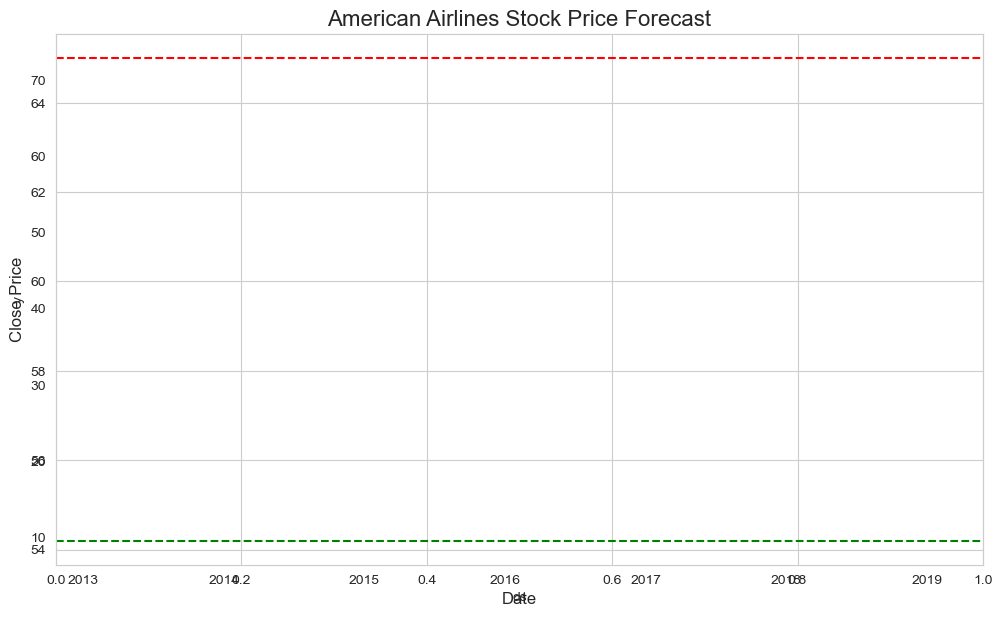

In [117]:
# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 2, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Dates Forecasting Resistance Line
resistance_date = dt.datetime(2016, 4, 7)
resistance_date1 = mdates.date2num(resistance_date)

# Dates Forecasting Support Line
support_date = dt.datetime(2013, 4, 7)
support_date1 = mdates.date2num(support_date)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("American Airlines Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 55), xytext=(starting_date1,40),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# # Trend emphasis arrow
ax1.annotate('Last Closing Price \n Before Forecast \n ($51.40)', xy=(trend_date1, 57), xytext=(trend_date1,70),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

# Resistance Line
ax1.annotate('Resistance Line \n of Forecast Peak ${:.2f}'.format(forecast["yhat"].max()), xy=(resistance_date1, 65), xytext=(resistance_date1,73),
            arrowprops=dict(facecolor='#FF0000', shrink=0.1),
            )

# Support Line
ax1.annotate('Support Line \n of Forecast Bottom \n $51.40', xy=(support_date1, 53), xytext=(support_date1,40),
            arrowprops=dict(facecolor='#00FF40', shrink=0.1),
            )

ax1.axhline(y=65, color='r', linestyle='--')
ax1.axhline(y=54.2, color='g', linestyle='--')

plt.show()

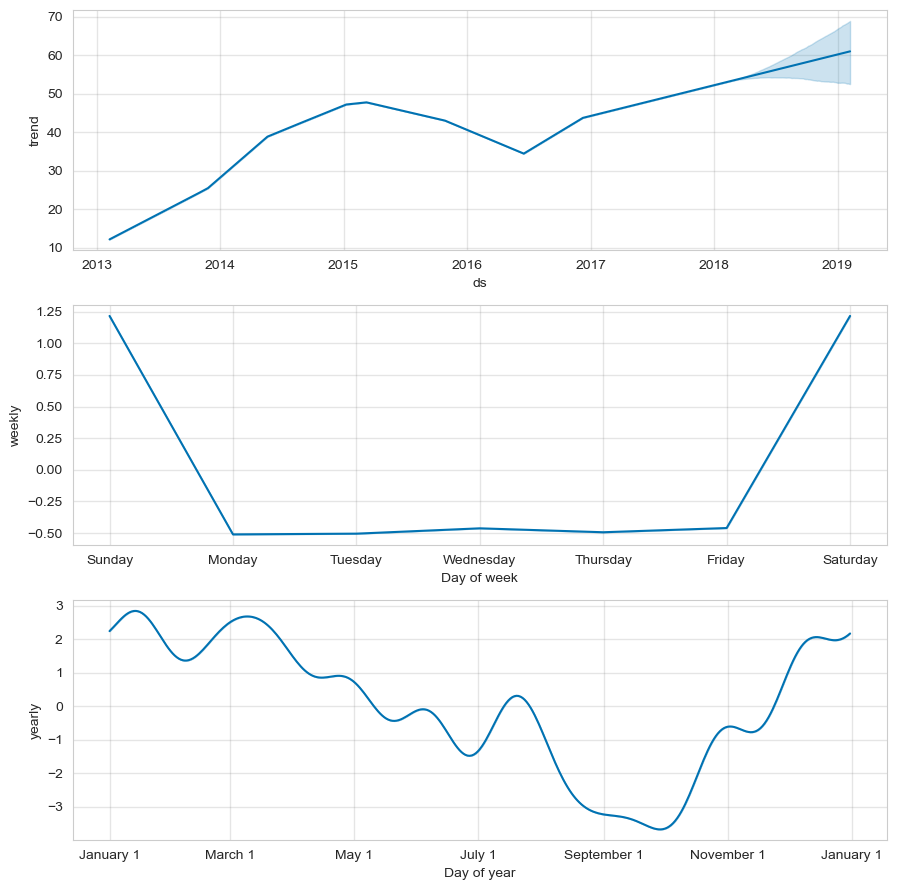

In [118]:
fig2 = m.plot_components(forecast)
plt.show()

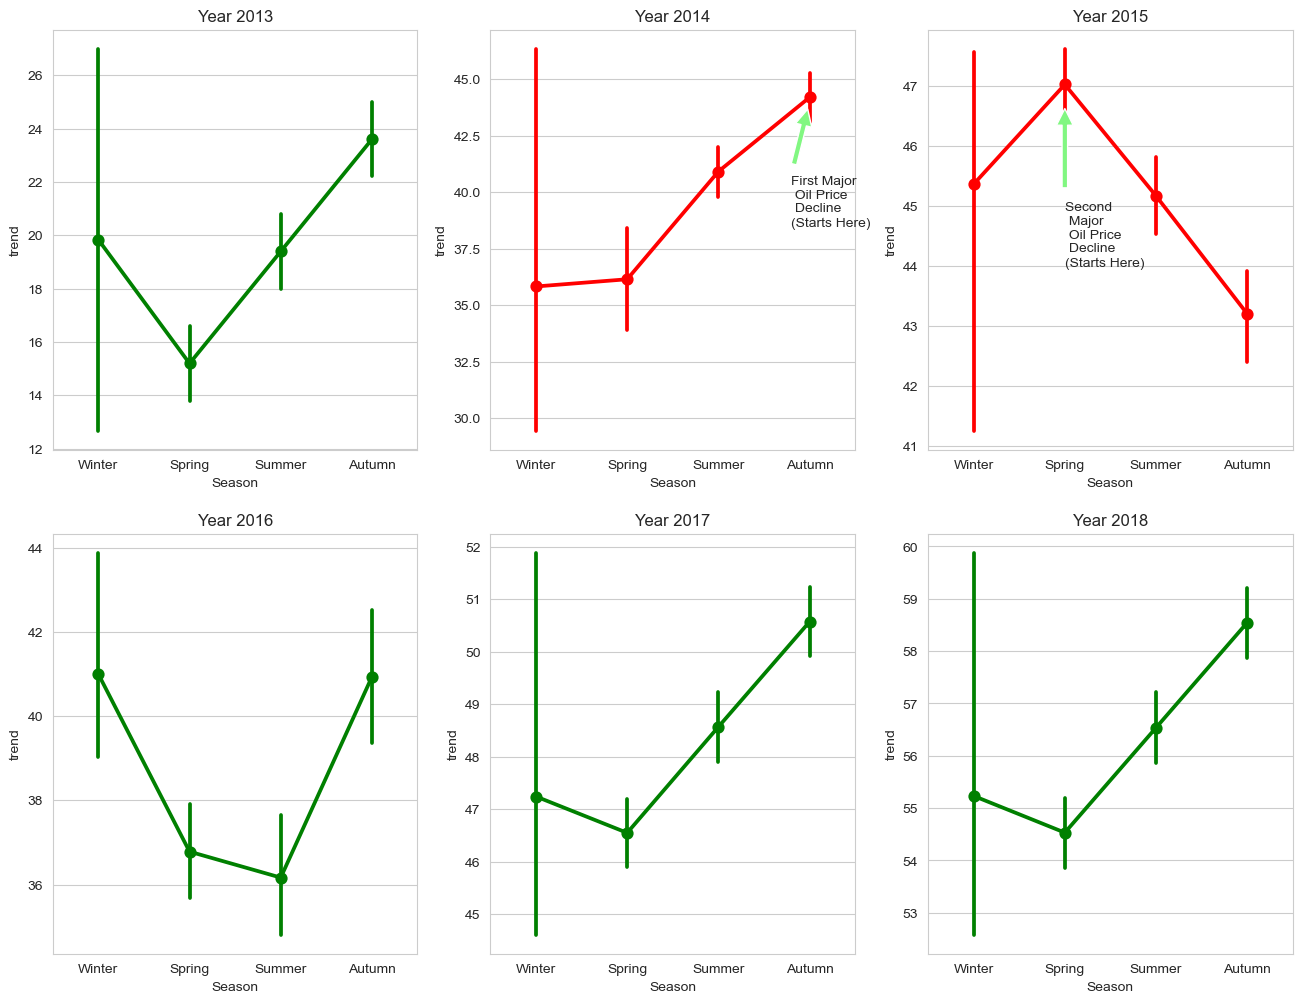

In [119]:
# Change dates from daily frequency to monthly frequency
forecast_monthly = forecast.resample('M', on='ds').mean()
forecast_monthly = forecast_monthly.reset_index() 


# Extract Year and Month and put it in a column.
forecast_monthly["month_int"] = forecast_monthly['ds'].dt.month
forecast_monthly["year"] = forecast_monthly['ds'].dt.year

forecast_monthly["month"] = np.nan
lst = [forecast_monthly]


for column in lst:
    column.loc[column["month_int"] == 1, "month"] = "January"
    column.loc[column["month_int"] == 2, "month"] = "February"
    column.loc[column["month_int"] == 3, "month"] = "March"
    column.loc[column["month_int"] == 4, "month"] = "April"
    column.loc[column["month_int"] == 5, "month"] = "May"
    column.loc[column["month_int"] == 6, "month"] = "June"
    column.loc[column["month_int"] == 7, "month"] = "July"
    column.loc[column["month_int"] == 8, "month"] = "August"
    column.loc[column["month_int"] == 9, "month"] = "September"
    column.loc[column["month_int"] == 10, "month"] = "October"
    column.loc[column["month_int"] == 11, "month"] = "November"
    column.loc[column["month_int"] == 12, "month"] = "December"
    
    
forecast_monthly['season'] = np.nan
lst2 = [forecast_monthly]

for column in lst2:
    column.loc[(column['month_int'] > 2) & (column['month_int'] <= 5), 'Season'] = 'Spring'
    column.loc[(column['month_int'] > 5) & (column['month_int'] <= 8), 'Season'] = 'Summer'
    column.loc[(column['month_int'] > 8) & (column['month_int'] <= 11), 'Season'] = 'Autumn'
    column.loc[column['month_int'] <= 2, 'Season'] = 'Winter'
    column.loc[column['month_int'] == 12, 'Season'] = 'Winter'
    
    

    

# Let's Create Seasonality Columns (Barplots that descripe the average trend per Season for each year)
# Create different axes by Year
df_2013 = forecast_monthly.loc[(forecast_monthly["year"] == 2013)]
df_2014 = forecast_monthly.loc[(forecast_monthly["year"] == 2014)]
df_2015 = forecast_monthly.loc[(forecast_monthly["year"] == 2015)]
df_2016 = forecast_monthly.loc[(forecast_monthly["year"] == 2016)]
df_2017 = forecast_monthly.loc[(forecast_monthly["year"] == 2017)]
df_2018 = forecast_monthly.loc[(forecast_monthly["year"] == 2018)]


f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,12))


# Year 2013
sns.pointplot(x="Season", y="trend",
                    data=df_2013, ax=ax1, color="g")

# Year 2014
sns.pointplot(x="Season", y="trend",
                    data=df_2014, ax=ax2, color="r")

# Year 2015
sns.pointplot(x="Season", y="trend",
                    data=df_2015, ax=ax3, color="r")


# Year 2016
sns.pointplot(x="Season", y="trend",
                    data=df_2016, ax=ax4, color="g")

# Year 2017
sns.pointplot(x="Season", y="trend",
                    data=df_2017, ax=ax5, color="g")

# Year 2018
sns.pointplot(x="Season", y="trend",
                    data=df_2018, ax=ax6, color="g")

ax1.set_title("Year 2013")
ax2.set_title("Year 2014")
ax3.set_title("Year 2015")
ax4.set_title("Year 2016")
ax5.set_title("Year 2017")
ax6.set_title("Year 2018")

# Oil dips
# September 2014 and June 2015
ax2.annotate('First Major \n Oil Price \n Decline \n(Starts Here)', xy=(3, 44), xytext=(2.8,38.5),
            arrowprops=dict(facecolor='#81F781', shrink=0.1),
            )


ax3.annotate('Second \n Major \n Oil Price \n Decline \n(Starts Here)', xy=(1, 46.8), xytext=(1,44),
            arrowprops=dict(facecolor='#81F781', shrink=0.1),
            )

plt.show()

 ADF Test to Confirm Stationarity

In [120]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -18.10116999820299
p-value: 2.553365197316532e-30


In [121]:
df['log_close'] = np.log(df['close'])


Stock Performance Comparison: AAPL, AMZN, GOOGL, MSFT Over Time

<Axes: xlabel='date', ylabel='close'>

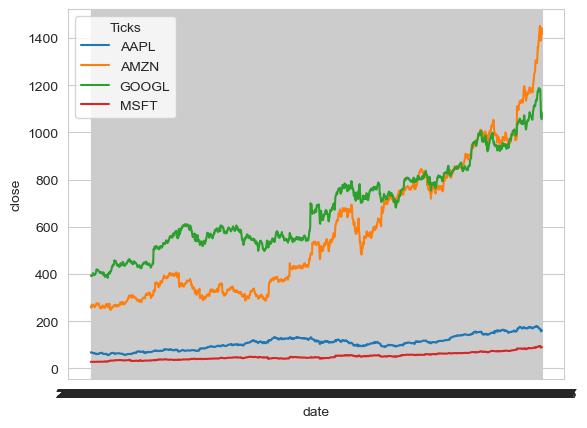

In [122]:
top_stocks = df[df['Ticks'].isin(['AMZN', 'AAPL', 'GOOGL', 'MSFT'])]
sns.lineplot(data=top_stocks, x='date', y='close', hue='Ticks')

From the time-series plot of closing prices:

Amazon (AMZN) shows the most aggressive upward trend, especially post-2017, indicating high growth and volatility.

Google (GOOGL) follows a strong growth trajectory with less volatility compared to AMZN.

Apple (AAPL) and Microsoft (MSFT) display steady, consistent growth, suggesting relatively stable investment profiles.

This comparison reveals differing investment profiles:

AMZN appears suitable for growth-focused investors,

AAPL and MSFT may appeal to those preferring long-term stable returns,

GOOGL strikes a balance between growth and stability.

Epoch 1/5
19344/19344 ━━━━━━━━━━━━━━━━━━━━ 293s 15ms/step - loss: 0.0023
Epoch 2/5
19344/19344 ━━━━━━━━━━━━━━━━━━━━ 290s 15ms/step - loss: 0.0023
Epoch 3/5
19344/19344 ━━━━━━━━━━━━━━━━━━━━ 282s 15ms/step - loss: 0.0023
Epoch 4/5
19344/19344 ━━━━━━━━━━━━━━━━━━━━ 286s 15ms/step - loss: 0.0022
Epoch 5/5
19344/19344 ━━━━━━━━━━━━━━━━━━━━ 300s 16ms/step - loss: 0.0022
19344/19344 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step
✅ RMSE: 97.08
✅ MAE : 49.03


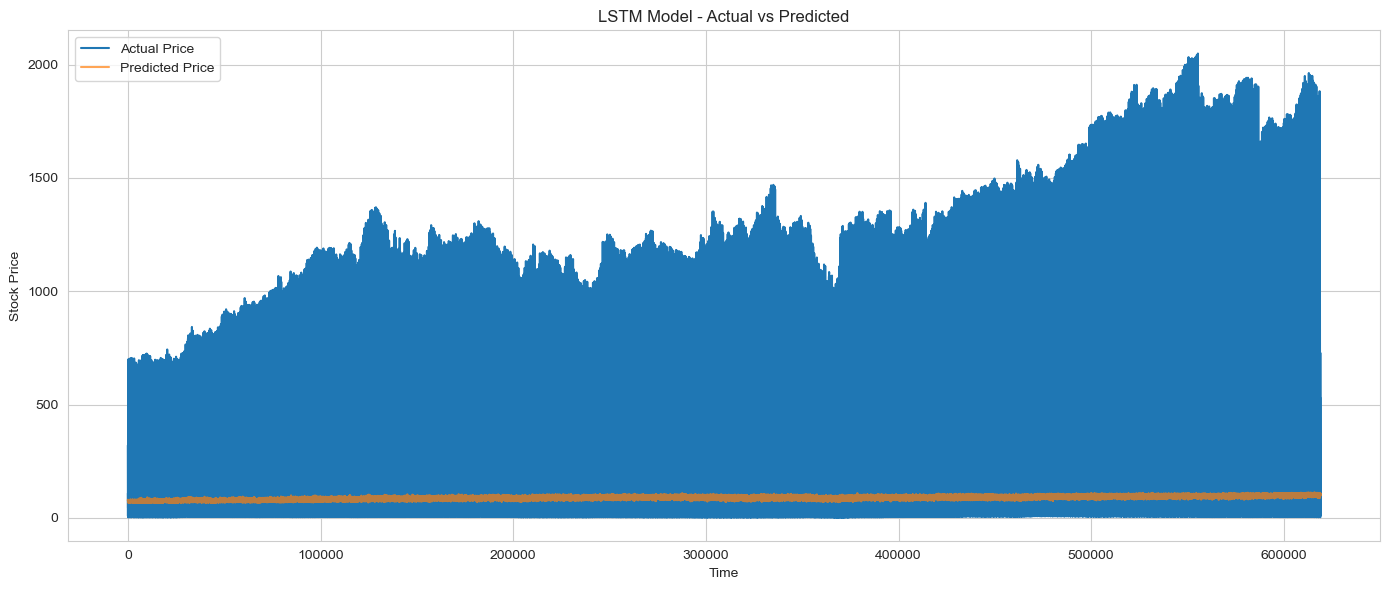

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ===============================
# STEP 1: Preprocess the Data
# ===============================
# Sort by date
df = df.sort_values('date')

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Use only the 'close' price
data = df[['close']].values

# Normalize using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ===============================
# STEP 2: Prepare Sequences
# ===============================
sequence_length = 60  # Look back 60 days
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]

# ===============================
# STEP 3: Build LSTM Model
# ===============================
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# ===============================
# STEP 4: Train Model
# ===============================
history = model.fit(X, y, epochs=5, batch_size=32, verbose=1)

# ===============================
# STEP 5: Predict and Evaluate
# ===============================
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Evaluate performance
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE : {mae:.2f}")

# ===============================
# STEP 6: Plot Results
# ===============================
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price', alpha=0.7)
plt.title('LSTM Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [124]:
q_low = df['close'].quantile(0.01)
q_high = df['close'].quantile(0.99)
df_filtered = df[(df['close'] > q_low) & (df['close'] < q_high)]


Price Movement with Bollinger Bands

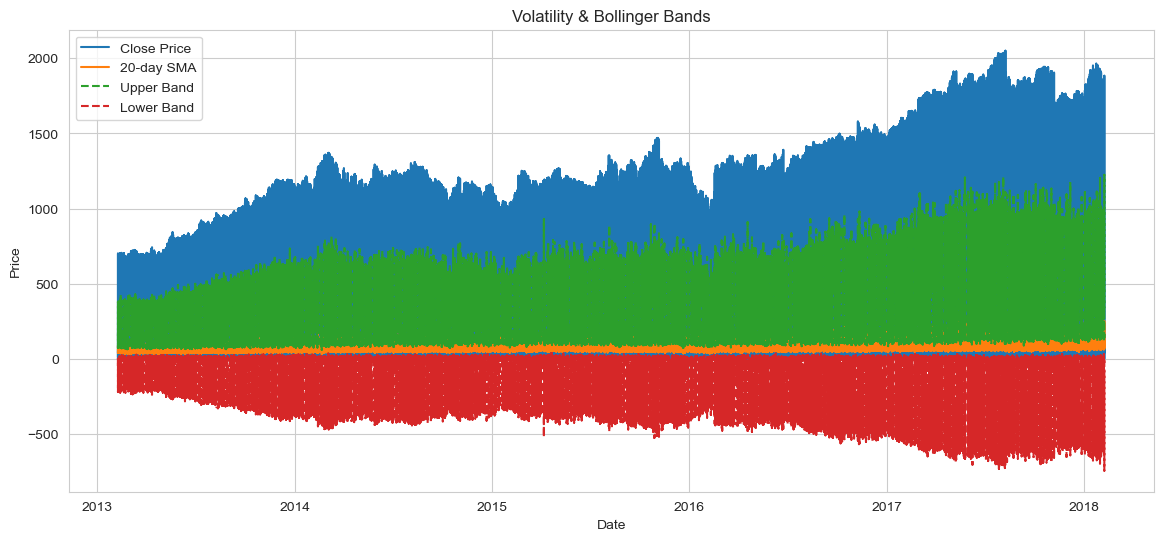

In [125]:
df['rolling_mean'] = df['close'].rolling(window=20).mean()
df['rolling_std'] = df['close'].rolling(window=20).std()

# Bollinger Bands
df['upper_band'] = df['rolling_mean'] + 2 * df['rolling_std']
df['lower_band'] = df['rolling_mean'] - 2 * df['rolling_std']

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['close'], label='Close Price')
plt.plot(df['rolling_mean'], label='20-day SMA')
plt.plot(df['upper_band'], label='Upper Band', linestyle='--')
plt.plot(df['lower_band'], label='Lower Band', linestyle='--')
plt.title('Volatility & Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


 how the stock's price moves in relation to its average behavior. When the price goes above the top band, it usually means the stock is getting expensive or "overbought." When it drops below the lower band, it may be "oversold" or undervalued.

These ups and downs — especially when the bands widen — show us moments of high market activity or uncertainty. On the other hand, when the bands tighten, it’s a sign that the stock is moving calmly and might be getting ready for a big move soon.

Overall, Bollinger Bands help us spot patterns, understand volatility, and make better timing decisions — whether we're looking to buy low, sell high, or simply avoid risky trades.

In [126]:
df['lag_1'] = df['close'].shift(1)
df['lag_2'] = df['close'].shift(2)
df['lag_3'] = df['close'].shift(3)


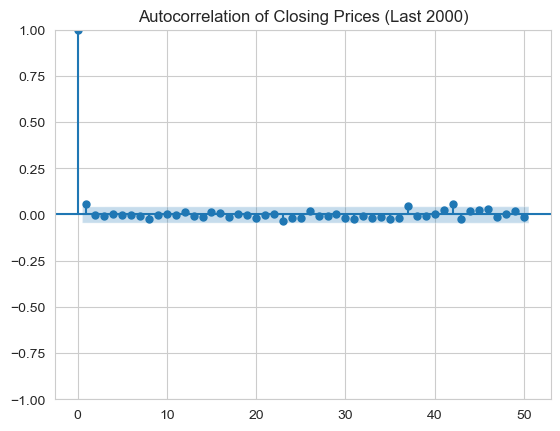

In [127]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['close'].dropna().iloc[-2000:], lags=50)
plt.title('Autocorrelation of Closing Prices (Last 2000)')
plt.show()


In [128]:
daily_returns = df['close'].pct_change().dropna()

# 99% Confidence Interval VaR
var_99 = np.percentile(daily_returns, 1)
print(f" 99% Daily VaR: {var_99 * 100:.2f}%")


 99% Daily VaR: -91.66%


STL Decomposition on Raw Closing Prices (Last 500 Observations)

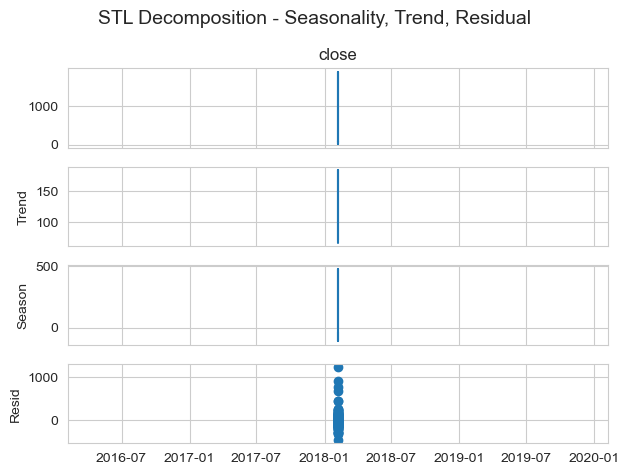

In [129]:
from statsmodels.tsa.seasonal import STL

# Use last 500 or full rows
series = df['close'].dropna().tail(500)

# STL Decomposition
stl = STL(series, period=30)
result = stl.fit()

# Plot
result.plot()
plt.suptitle('STL Decomposition - Seasonality, Trend, Residual', fontsize=14)
plt.tight_layout()
plt.show()


raw closing price data suffers from extreme volatility and potential outliers, which distorts the clarity of the trend, seasonality, and residual components. The spike in values indicates that raw prices are not ideal for direct time series modeling. To improve interpretability and stability, it's recommended to first remove outliers and/or apply log transformation before decomposition or forecasting. This step lays the foundation for cleaner signal extraction in subsequent analysis.

Original Closing Prices Over Time

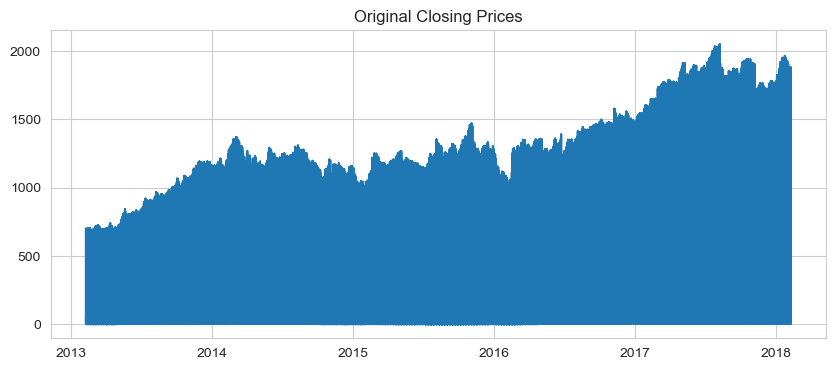

In [130]:
plt.figure(figsize=(10,4))
plt.plot(df['close'])
plt.title("Original Closing Prices")
plt.grid(True)
plt.show()


The plot of original closing prices shows a strong upward trend over the years, reflecting consistent growth in stock value. However, we can also observe sudden spikes and dips, indicating potential volatility and outliers. While the trend is informative, the raw data contains fluctuations that may obscure patterns in seasonality or residuals. Further preprocessing—such as log transformation or outlier filtering—can help reveal clearer underlying structures in the time series.

In [131]:
df['log_close'] = np.log1p(df['close'])  # log1p avoids log(0)

STL Decomposition on Log-Transformed Closing Prices


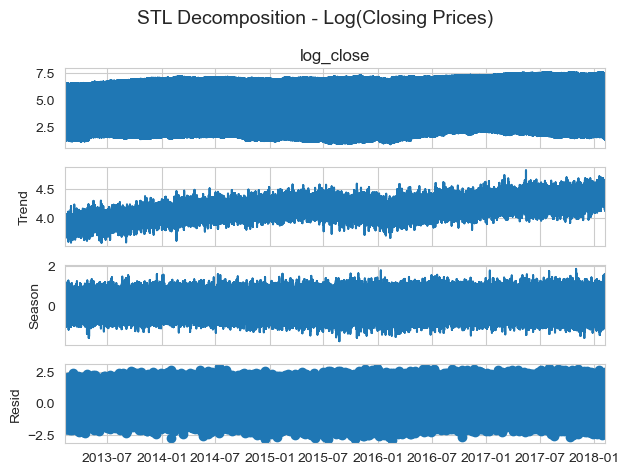

In [ ]:
from statsmodels.tsa.seasonal import STL

result = STL(df['log_close'], period=30).fit()  
result.plot()
plt.suptitle('STL Decomposition - Log(Closing Prices)', fontsize=14)
plt.tight_layout()
plt.show()


Applying STL decomposition on the log-transformed closing prices allows us to clearly identify the underlying components:

- **Trend:** Shows a smooth and consistent upward movement, reflecting long-term growth.
- **Seasonality:** Displays short-term cyclic patterns, possibly due to market behavior or recurring events.
- **Residual:** Captures noise and irregularities that aren't explained by trend or seasonality.

Log transformation helped stabilize variance, making these components easier to analyze. This step is valuable for further forecasting and anomaly detection.


STL Decomposition and Residual Volatility Analysis (Post Outlier Removal & Log Transformation)

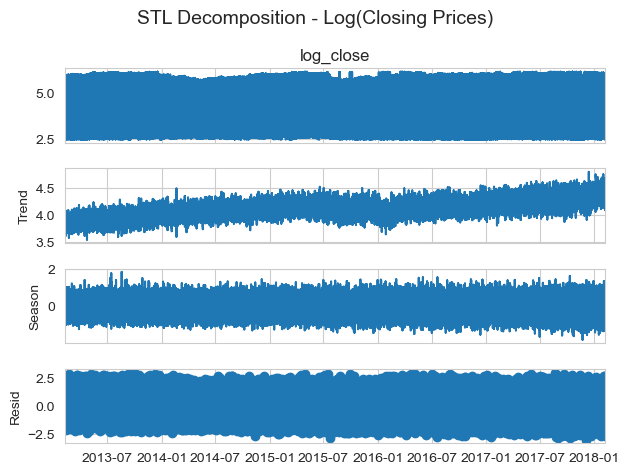

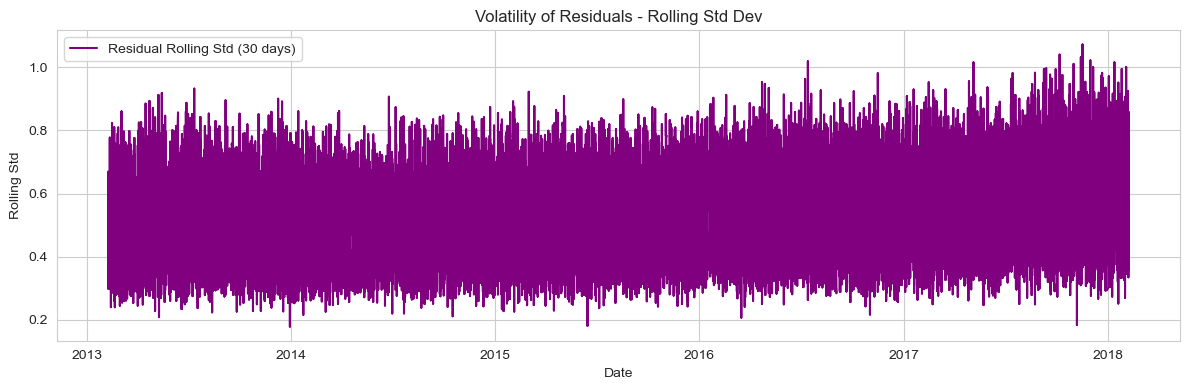

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# ✅ STEP 1: Only convert if 'date' is a column
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

# ✅ STEP 2: Remove outliers using 1st and 99th percentiles
q_low = df['close'].quantile(0.01)
q_high = df['close'].quantile(0.99)
df = df[(df['close'] > q_low) & (df['close'] < q_high)]

# ✅ STEP 3: Apply log transform to stabilize variance
df['log_close'] = np.log(df['close'])

# ✅ STEP 4: STL decomposition
stl = STL(df['log_close'], period=30, robust=True)
result = stl.fit()

# ✅ STEP 5: Plot STL
result.plot()
plt.suptitle('STL Decomposition - Log(Closing Prices)', fontsize=14)
plt.tight_layout()
plt.show()

# ✅ STEP 6: Residual volatility (rolling std)
df['resid'] = result.resid
df['rolling_std'] = df['resid'].rolling(window=30).std()

plt.figure(figsize=(12, 4))
plt.plot(df['rolling_std'], label='Residual Rolling Std (30 days)', color='purple')
plt.title('Volatility of Residuals - Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Rolling Std')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


After removing outliers and applying a logarithmic transformation to the closing prices, the STL decomposition provides a clearer separation of the trend, seasonality, and residual components.

The trend now shows a smoother, more interpretable growth pattern.

The seasonality is more stabilized, indicating minor periodic fluctuations.

The residuals, when analyzed using rolling standard deviation, reveal periods of heightened volatility, which can help identify risk-sensitive intervals or market shocks.

1-Day Value at Risk (VaR) at 95% Confidence Level


In [134]:
import numpy as np

# Daily returns
returns = df['close'].pct_change().dropna()

# 95% confidence VaR (1-day)
var_95 = np.percentile(returns, 5)  # 5th percentile
print(f"✅ Value at Risk (95% confidence): {var_95:.4f}")


✅ Value at Risk (95% confidence): -0.7680


The calculated Value at Risk (VaR) at 95% confidence indicates that under normal market conditions, the worst expected loss over a 1-day period will not exceed -0.7670% of the stock’s value.
This means there's only a 5% chance the loss will be greater than this threshold on any given day, which is helpful for assessing downside risk and making informed investment decisions.

Partial Autocorrelation (PACF) of Closing Prices

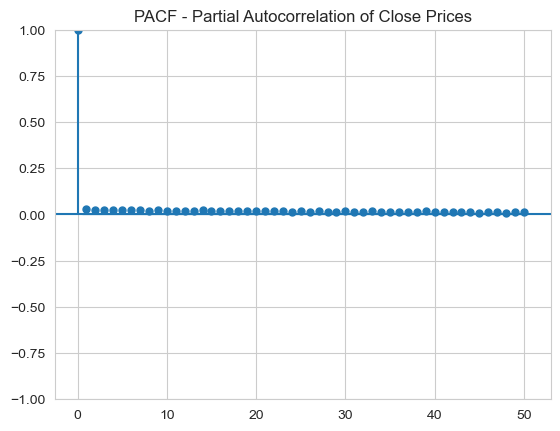

In [135]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['close'].dropna(), lags=50)
plt.title("PACF - Partial Autocorrelation of Close Prices")
plt.grid(True)
plt.show()


The PACF plot shows a strong spike at lag 1 followed by values that quickly drop close to zero, suggesting that the closing prices have significant short-term dependencies but minimal influence from longer lags.
This pattern indicates that an AR(1) model may be sufficient to capture the autoregressive behavior of the time series, making it a good candidate for ARIMA or AR models.

Sharpe Ratio Analysis for Stock Returns

In [136]:
risk_free_rate = 0.01  # Assume 1% annual
daily_returns = df['close'].pct_change().dropna()

excess_returns = daily_returns - risk_free_rate / 252
sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)

print(f"✅ Sharpe Ratio: {sharpe_ratio:.2f}")


✅ Sharpe Ratio: 0.30


The calculated Sharpe Ratio of 0.30 suggests that the stock's excess return over the risk-free rate is positive but modest relative to its volatility.
In general, a Sharpe Ratio:

< 1.0 indicates low risk-adjusted return,

1.0–2.0 is acceptable,

> 2.0 is very good.

This indicates the stock provides some risk-adjusted performance, but may not be ideal for aggressive risk-tolerant investors. However, it could still be valuable as part of a diversified portfolio.